# MNIST Classification via Neural Network

To build the neural network are going to use the TensorFlow library. Along the way we will talk about how to use a neural network to solve a classification problem, and the choices made when building a neural network.

Tensorflow is a numerical computation library that focuses on machine learning models. It is written in Python but uses C++ for speed with large scale data. 

In [1]:
pip install tensorflow

  Created wheel for absl-py: filename=absl_py-0.9.0-cp36-none-any.whl size=121937 sha256=62a4294a4ea9b562354f1779447a483f184a79d0ad9511b8d6bfa18c6aedabc5
  Stored in directory: C:\Users\joebr\AppData\Local\pip\Cache\wheels\8e\28\49\fad4e7f0b9a1227708cbbee4487ac8558a7334849cb81c813d
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7547 sha256=c64f43e9852a923b5ec99adc070db242d41d3f3fc6fc3754c225e45b1170ac03
  Stored in directory: C:\Users\joebr\AppData\Local\pip\Cache\wheels\5c\2e\7e\a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Created wheel for termcolor: filename=termcolor-1.1.0-cp36-none-any.whl size=4835 sha256=8e1b6e5deba96d74c951464e6c9e31cd5a7669131987ae1089dfe826786a3dd9
  Stored in directory: C:\Users\joebr\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built absl-py gast termcolor
  Found existing installation: scipy 1.3.1
    Uninstalling scipy-1.3.1:
      Successfully uninstalled scipy-1.3.1

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\joebr\\anaconda3\\lib\\site-packages\\~cipy\\integrate\\lsoda.cp36-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [ ]:
# this clears some errors, but isn't necessary for the rest
pip install "numpy<1.17"

## Get the data 
* We can do this by applying the load_data method on the mnist data in keras
* By default, the data has been split into training and test set

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


## Explore the data
* Check the shape (the dimensions of the data)
* View an image

In [3]:
print('Shape of training data: ' ,X_train.shape)
print('Amount of testing data: ' , len(X_test))
print('Shape of training classifications: ' , y_train.shape)

Shape of training data:  (60000, 28, 28)
Amount of testing data:  10000
Shape of training classifications:  (60000,)


Classification is  6


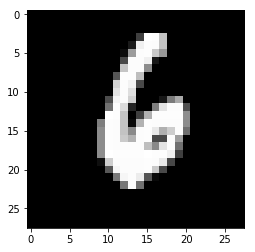

In [5]:
import matplotlib.pyplot as plt 
import numpy as np

num = 147
print('Classification is ', y_train[num])
img = np.reshape(X_train[num], (28, 28))
plt.imshow(img,cmap='gray')
plt.show()

## Reshape the data
* Since we are using a fully connected layer which has shape = (samples, features), we need to reshape the training and test samples to suit that dimension.
* Also, we will scale our values to be in [0,1] interval and convert to float32.
* Previously, the values are of type unit8 and in the [0, 255].
* Also, reshape the labels to have categories 

In [6]:
X_train = X_train.reshape((60000, 28 * 28))
X_train = X_train.astype('float32')/255

X_test = X_test.reshape((10000, 28 * 28))
X_test = X_test.astype('float32')/255


# reshape the labels

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Examine the data

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Our labels have 10 classes


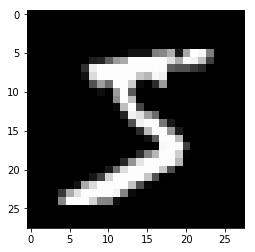

In [7]:
print(X_train[:10])
plt.imshow(np.reshape(X_train[0],(28,28)),cmap='gray')
print("Our labels have {} classes".format(y_train.shape[1]))

## Build your architecture
We are using the sequential model in keras which involves stacking up the layers sequentially.
* Here, we are using 3 fully connected layers
* Specify the activation function (e.g. Relu)
* Specify the number of nodes in each hidden layer

In [131]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# instantiate the model
model = Sequential() 

# the first layer is where we specify the input shape
model.add(Dense(256, activation = 'relu', input_shape = (28 * 28, )))  
model.add(Dense(4, activation = 'relu'))

# in the last layer, we specify number of labels to expect
model.add(Dense(10, activation = 'softmax'))   



## Compile the network
* Here, we specify the optimizer to use for our weight update (e.g. RMSprop)
* Specify the loss function (e.g. categorical_crossentropy)
* Metrics to monitor (e.g. accuracy)

In [132]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

## Fit the model
* specify the number of epochs; epochs refers to the number of iteration to train all the data.
* batch size: batches of data to use for training at a time
  
After the model is trained, we will plot some metrics to see how things changed during the training

In [133]:
history = model.fit(X_train, y_train, epochs = 5, batch_size = 128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.8669 - accuracy: 0.7259
Epoch 2/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2884 - accuracy: 0.9277
Epoch 3/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.1892 - accuracy: 0.9516
Epoch 4/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1484 - accuracy: 0.9619
Epoch 5/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.1234 - accuracy: 0.9690


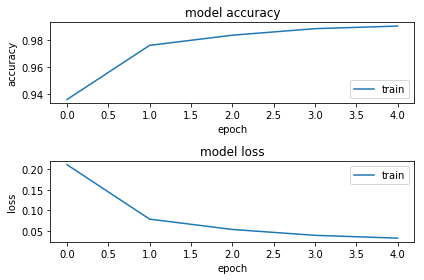

In [71]:
# plot some metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## Evaluate the model's performance
* Examine the model's performance on the test data to see if it overfits

In [134]:
test_lossb4, test_accb4 = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 86us/sample - loss: 0.1495 - accuracy: 0.9635


## Save your model
* It is a good practice to save your model
* To reuse your saved model, type: from keras.models import load_model
* Then, load_model('model name')
* The saved model saves the layers used with the network updates

In [12]:
model.save('my_model.h5')

## Generate predictions
* Use the testing data to see the model's predictions
* Display a test image and its prediction

Predicted:  9


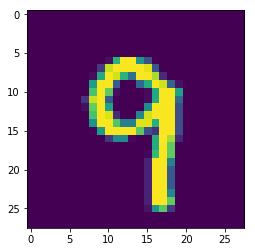

In [18]:
predictions = model.predict_classes(X_test)

img = np.reshape(X_test[481],(28,28))
plt.imshow(img)
print('Predicted: ',predictions[481])

# Workshop Tasks
1. Modify the network architecture by changing the number of layers, the number of nodes, and/or the activation function. Do your changes help or hurt the accuracy?
2. Modify the model fit by changing the number of epochs and/or batch_size. Do your changes help or hurt the accuracy?
3. Try building a model for the MNIST Fashion dataset, which has clothing classifications instead of digits. You will need to load the MNIST Fashion data, build an architecture then compile and fit a model. Then you can inspect accuracy and visualize your predictions. 

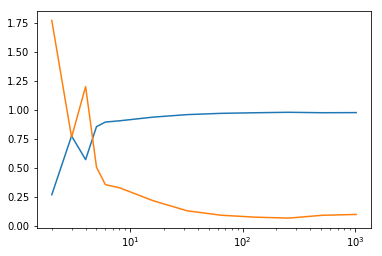

In [100]:
plt.plot([2,3,4,5,6,8,16,32,64,128,256,512,1024],
 [test_acc2,test_acc3,test_acc4,test_acc5,test_acc6,test_acc8,test_acc16,test_acc32,test_acc64,test_acc128,test_acc256,test_acc,test_acc1024])
plt.xscale('log')
plt.plot([2,3,4,5,6,8,16,32,64,128,256,512,1024],
 [test_loss2,test_loss3,test_loss4,test_loss5,test_loss6,test_loss8,test_loss16,test_loss32,test_loss64,test_loss128,test_loss256,test_loss,test_loss1024])
plt.xscale('log')

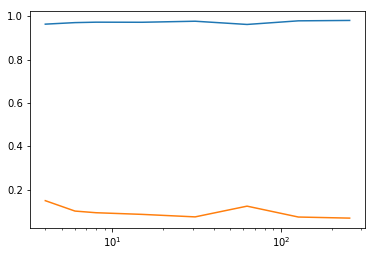

In [135]:
plt.plot([4,6,8,15,31,63,127,256],
 [test_accb4,test_accb6,test_accb8,test_acc15,test_acc31,test_acc63,test_acc127,test_acc256])
plt.xscale('log')
plt.plot([4,6,8,15,31,63,127,256],
 [test_lossb4,test_lossb6,test_lossb8,test_loss15,test_loss31,test_loss63,test_loss127,test_loss256])
plt.xscale('log')